In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machinelearningprojectappoach-02/sample_submission (3).csv
/kaggle/input/machinelearningprojectappoach-02/train (3).csv
/kaggle/input/machinelearningprojectappoach-02/test (3).csv


In [2]:
df_train=pd.read_csv("/kaggle/input/machinelearningprojectappoach-02/train (3).csv")
df_test=pd.read_csv("/kaggle/input/machinelearningprojectappoach-02/test (3).csv")

In [3]:
df_train = df_train.reindex(sorted(df_train.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)

In [4]:
print(df_train.isnull().sum())

album_component_count    4363
album_name_length        9594
artist_count             3261
beat_frequency_0         9731
beat_frequency_1          386
                         ... 
track_identifier         4436
vocal_presence_0          110
vocal_presence_1          865
vocal_presence_2         2534
weekday_of_release       5058
Length: 62, dtype: int64


In [5]:
print(df_test.isnull().sum())

album_component_count    2878
album_name_length        6256
artist_count             2265
beat_frequency_0         6457
beat_frequency_1          279
                         ... 
track_identifier         2951
vocal_presence_0           65
vocal_presence_1          544
vocal_presence_2         1692
weekday_of_release       3392
Length: 61, dtype: int64


In [6]:
Data_Frame=pd.DataFrame(index=df_train.columns.to_list())
Data_Frame['type']=df_train.dtypes
Data_Frame['Counts']=df_train.count()
Data_Frame['UniqueValues']=df_train.nunique()
Data_Frame['Null']=df_train.isnull().sum()

with pd.option_context('display.max_rows', None):
    display(Data_Frame)


,type,Counts,UniqueValues,Null
album_component_count,float64,57246,164,4363
album_name_length,float64,52015,136,9594
artist_count,float64,58348,15,3261
beat_frequency_0,float64,51878,17047,9731
beat_frequency_1,float64,61223,18500,386
beat_frequency_2,float64,59843,18229,1766
composition_label_0,object,58660,21709,2949
composition_label_1,object,60149,22930,1460
composition_label_2,object,57146,22169,4463
creator_collective,object,52695,15139,8914


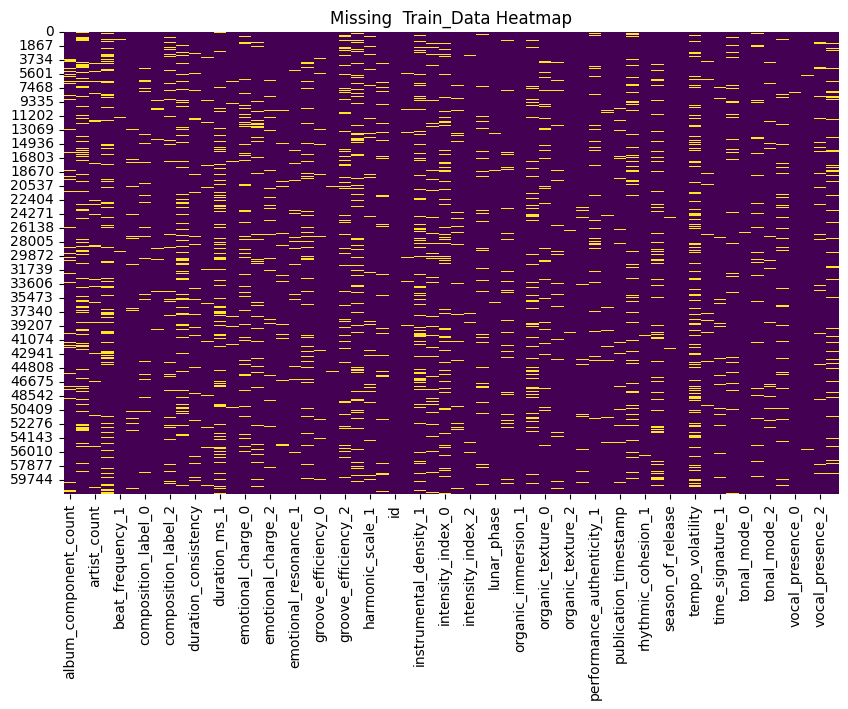

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cmap="viridis", cbar=False)
plt.title("Missing  Train_Data Heatmap")
plt.show()

In [8]:
Data_Frame1=pd.DataFrame(index=df_test.columns.to_list())
Data_Frame1['type']=df_test.dtypes
Data_Frame1['Counts']=df_test.count()
Data_Frame1['UniqueValues']=df_test.nunique()
Data_Frame1['Null']=df_test.isnull().sum()

with pd.option_context('display.max_rows', None):
    display(Data_Frame1)


,type,Counts,UniqueValues,Null
album_component_count,float64,38196,152,2878
album_name_length,float64,34818,131,6256
artist_count,float64,38809,12,2265
beat_frequency_0,float64,34617,13219,6457
beat_frequency_1,float64,40795,14358,279
beat_frequency_2,float64,39849,14112,1225
composition_label_0,object,39156,15986,1918
composition_label_1,object,40075,16824,999
composition_label_2,object,38192,16309,2882
creator_collective,object,35064,11311,6010


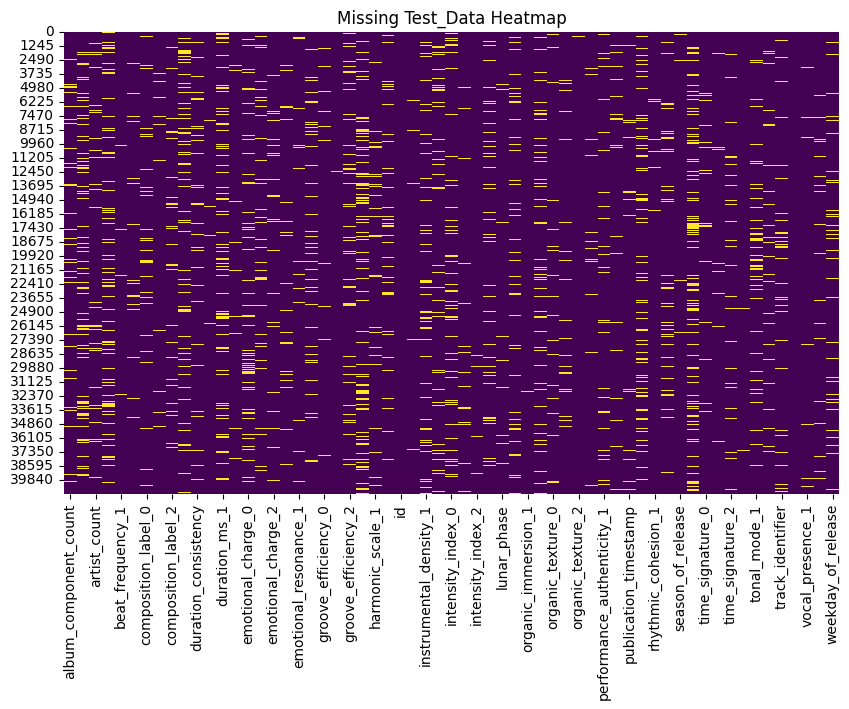

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_test.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Test_Data Heatmap")
plt.show()

In [10]:
df_train['is_train'] = 1
df_test['is_train'] = 0
test_ids = df_test['id']

In [11]:
combined_df = pd.concat([df_train, df_test], axis=0)

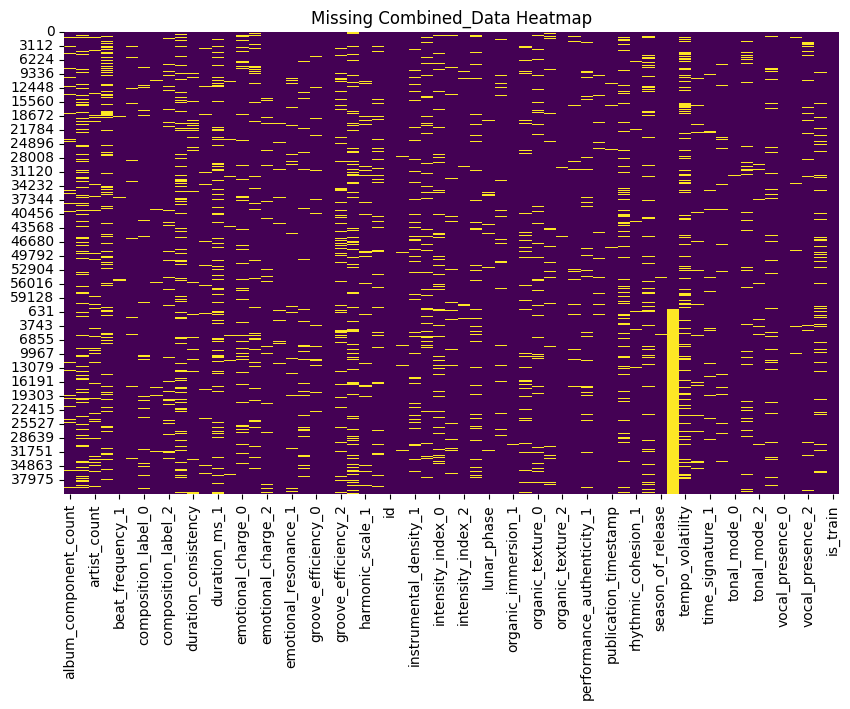

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Combined_Data Heatmap")
plt.show()

In [13]:
import pandas as pd
from datetime import datetime

# Keep original timestamp column
combined_df['original_publication_timestamp'] = combined_df['publication_timestamp']

# Convert to datetime
combined_df['publication_timestamp'] = pd.to_datetime(combined_df['publication_timestamp'], errors='coerce')

# Weekday mapping
weekday_name_map = {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
}

# Create mask for valid timestamps
valid_timestamps_mask = combined_df['publication_timestamp'].notna()

# Add weekday column
combined_df.loc[valid_timestamps_mask, 'release_weekday'] = (
    combined_df.loc[valid_timestamps_mask, 'publication_timestamp']
    .dt.weekday
    .map(weekday_name_map)
)

# Season classification function
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:  # September, October, November
        return 'autumn'

# Add seasonal and temporal features
combined_df.loc[valid_timestamps_mask, 'release_season'] = (
    combined_df.loc[valid_timestamps_mask, 'publication_timestamp']
    .dt.month
    .apply(get_season)
)

combined_df.loc[valid_timestamps_mask, 'release_year'] = (
    combined_df.loc[valid_timestamps_mask, 'publication_timestamp']
    .dt.year
)

combined_df.loc[valid_timestamps_mask, 'release_month'] = (
    combined_df.loc[valid_timestamps_mask, 'publication_timestamp']
    .dt.month
)

mask = (combined_df['album_name_length'].isna()) & (combined_df['track_identifier'].notna())
combined_df.loc[mask, 'album_name_length'] = combined_df.loc[mask, 'track_identifier'].str.len()

# Verify the changes
print(f"Number of album_name_length values derived from track_identifier: {mask.sum()}")
print(f"Remaining missing album_name_length values: {combined_df['album_name_length'].isna().sum()}")

# Replace NaN values with mode for categorical columns
replace_with_mode_cols = [
    'weekday_of_release', 
    'season_of_release', 
    'lunar_phase', 
    'artist_count',
    'instrumental_density_0',
    'instrumental_density_1',
    'instrumental_density_2',
    'key_variety',
    'time_signature_0',
    'time_signature_1',
    'time_signature_2',
    'tonal_mode_0',
    'tonal_mode_1',
    'tonal_mode_2',
    ]

for col in replace_with_mode_cols:
    mode_value = combined_df[col].mode()[0]
    combined_df.fillna({col: mode_value}, inplace=True)
    # Get remaining columns with null values
remaining_null_cols = combined_df.columns[combined_df.isnull().any()].tolist()
print(f"Columns with remaining nulls: {remaining_null_cols}")
print(f"Number of nulls in each: {combined_df[remaining_null_cols].isnull().sum()}")





Number of album_name_length values derived from track_identifier: 14701
Remaining missing album_name_length values: 1149
Columns with remaining nulls: ['album_component_count', 'album_name_length', 'beat_frequency_0', 'beat_frequency_1', 'beat_frequency_2', 'composition_label_0', 'composition_label_1', 'composition_label_2', 'creator_collective', 'duration_consistency', 'duration_ms_0', 'duration_ms_1', 'duration_ms_2', 'emotional_charge_0', 'emotional_charge_1', 'emotional_charge_2', 'emotional_resonance_0', 'emotional_resonance_1', 'emotional_resonance_2', 'groove_efficiency_0', 'groove_efficiency_1', 'groove_efficiency_2', 'harmonic_scale_0', 'harmonic_scale_1', 'harmonic_scale_2', 'intensity_index_0', 'intensity_index_1', 'intensity_index_2', 'organic_immersion_0', 'organic_immersion_1', 'organic_immersion_2', 'organic_texture_0', 'organic_texture_1', 'organic_texture_2', 'performance_authenticity_0', 'performance_authenticity_1', 'performance_authenticity_2', 'publication_timestam

In [14]:
Data_Frame2=pd.DataFrame(index=combined_df.columns.to_list())
Data_Frame2['type']=combined_df.dtypes
Data_Frame2['Counts']=combined_df.count()
Data_Frame2['UniqueValues']=combined_df.nunique()
Data_Frame2['Null']=combined_df.isnull().sum()

with pd.option_context('display.max_rows', None):
    display(Data_Frame2)

,type,Counts,UniqueValues,Null
album_component_count,float64,95442,189,7241
album_name_length,float64,101534,151,1149
artist_count,float64,102683,16,0
beat_frequency_0,float64,86495,23530,16188
beat_frequency_1,float64,102018,25071,665
beat_frequency_2,float64,99692,24751,2991
composition_label_0,object,97816,31680,4867
composition_label_1,object,100224,33464,2459
composition_label_2,object,95338,32420,7345
creator_collective,object,87759,21298,14924


In [15]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')  # or 'mean'
numeric_cols = combined_df.select_dtypes(include=['float64']).columns
combined_df[numeric_cols] = num_imputer.fit_transform(combined_df[numeric_cols])

In [16]:
categorical_cols = combined_df.select_dtypes(include=['object']).columns
combined_df[categorical_cols] = combined_df[categorical_cols].fillna('Missing')

In [17]:
combined_df=combined_df.drop(columns=[
    'original_publication_timestamp',
    'publication_timestamp',
    
])

In [18]:
Data_Frame2=pd.DataFrame(index=combined_df.columns.to_list())
Data_Frame2['type']=combined_df.dtypes
Data_Frame2['Counts']=combined_df.count()
Data_Frame2['UniqueValues']=combined_df.nunique()
Data_Frame2['Null']=combined_df.isnull().sum()

with pd.option_context('display.max_rows', None):
    display(Data_Frame2)

,type,Counts,UniqueValues,Null
album_component_count,float64,102683,189,0
album_name_length,float64,102683,151,0
artist_count,float64,102683,16,0
beat_frequency_0,float64,102683,23530,0
beat_frequency_1,float64,102683,25071,0
beat_frequency_2,float64,102683,24752,0
composition_label_0,object,102683,31681,0
composition_label_1,object,102683,33464,0
composition_label_2,object,102683,32420,0
creator_collective,object,102683,21299,0


In [19]:
# Columns to exclude
exclude_cols = ['target', 'is_train', 'id']

# Categorical columns (object type or low-cardinality numeric)
categorical_cols = [
    'composition_label_0', 'composition_label_1', 'composition_label_2',
    'creator_collective', 'harmonic_scale_0', 'harmonic_scale_1', 
    'harmonic_scale_2', 'lunar_phase', 'season_of_release',
    'time_signature_0', 'time_signature_1', 'time_signature_2',
    'tonal_mode_0', 'tonal_mode_1', 'tonal_mode_2', 'track_identifier',
    'weekday_of_release', 'release_weekday', 'release_season'
]
import pandas as pd

def frequency_encoding(df, columns):
    """
    Perform frequency encoding on specified columns
    
    Args:
        df: pandas DataFrame
        columns: list of column names to encode
        
    Returns:
        DataFrame with encoded columns (original columns are replaced)
    """
    df_encoded = df.copy()
    
    for col in columns:
        # Calculate frequencies
        freq = df_encoded[col].value_counts(normalize=True)
        
        # Map frequencies to values
        df_encoded[col] = df_encoded[col].map(freq)
        
        # Fill any remaining NaN (for unseen categories) with 0
        df_encoded[col] = df_encoded[col].fillna(0)
    
    return df_encoded

# Apply frequency encoding
combined_df_encoded = frequency_encoding(combined_df, categorical_cols)

In [20]:
combined_df_encoded.head()

,album_component_count,album_name_length,artist_count,beat_frequency_0,beat_frequency_1,beat_frequency_2,composition_label_0,composition_label_1,composition_label_2,creator_collective,...,track_identifier,vocal_presence_0,vocal_presence_1,vocal_presence_2,weekday_of_release,is_train,release_weekday,release_season,release_year,release_month
0,6.0,14.0,2.0,95.992,80.018,162.045,0.000360,0.000390,0.071560,0.000331,...,0.071940,0.1420,0.0574,0.0322,0.528218,1,0.474119,0.258202,2021.0,6.0
1,3.0,15.0,2.0,148.076,147.966,125.964,0.000010,0.000019,0.000010,0.000010,...,0.000010,0.4760,0.7210,0.0606,0.095264,1,0.100747,0.258202,2019.0,7.0
2,14.0,7.0,2.0,124.738,142.980,134.403,0.000029,0.000019,0.071560,0.000019,...,0.000029,0.2890,0.4030,0.3280,0.528218,1,0.166220,0.254025,2014.0,11.0
3,15.0,5.0,2.0,119.852,123.063,107.936,0.000010,0.000010,0.000010,0.145341,...,0.000010,0.0367,0.0581,0.0630,0.528218,1,0.474119,0.254025,2015.0,9.0
4,17.0,5.0,2.0,118.006,132.722,0.000,0.000390,0.000360,0.000351,0.000351,...,0.000360,0.0430,0.0397,0.0000,0.528218,1,0.042880,0.239933,2006.0,1.0


In [21]:
# Split the combined dataset back into train and test
train_df_encoded = combined_df_encoded[combined_df_encoded['is_train'] == 1].copy()
test_df_encoded = combined_df_encoded[combined_df_encoded['is_train'] == 0].copy()

# Drop the is_train column from both datasets
train_df_encoded.drop('is_train', axis=1, inplace=True)
test_df_encoded.drop(['is_train', 'target'], axis=1, inplace=True)

# Reset indices for both datasets
train_df_encoded.reset_index(drop=True, inplace=True)
test_df_encoded.reset_index(drop=True, inplace=True)

# Verify the shapes
print(f"Original train shape: {df_train.shape}")
print(f"New train shape: {train_df_encoded.shape}")
print(f"Original test shape: {df_test.shape}")
print(f"New test shape: {test_df_encoded.shape}")


Original train shape: (61609, 63)
New train shape: (61609, 65)
Original test shape: (41074, 62)
New test shape: (41074, 64)


In [22]:
from sklearn.model_selection import train_test_split
X = train_df_encoded.drop(columns=["target", "id"])
y = train_df_encoded["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Extremely Randomized Trees": ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror'),
    "LightGBM": LGBMRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"{name}: RMSE = {rmse:.4f}")

Linear Regression: RMSE = 19.3740
Ridge Regression: RMSE = 19.3739
Lasso Regression: RMSE = 20.7352
Decision Tree: RMSE = 13.4477
Random Forest: RMSE = 9.2896
Extremely Randomized Trees: RMSE = 9.3481
Gradient Boosting: RMSE = 11.6939
Support Vector Regressor: RMSE = 21.4207
XGBoost Regressor: RMSE = 9.7530
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10684
[LightGBM] [Info] Number of data points in the train set: 49287, number of used features: 63
[LightGBM] [Info] Start training from score 52.070120
LightGBM: RMSE = 10.4298


In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Prepare your training data (assuming train_df_encoded exists)
X_train = train_df_encoded.drop(columns=["target", "id"])
y_train = train_df_encoded["target"]

# 2. Train the model with your best parameters
best_params = {
    'n_estimators': 500,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': None
}

model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)  # THIS IS THE CRUCIAL STEP YOU WERE MISSING

# 3. Prepare test data (must have same features as training)
X_test = test_df_encoded.drop(columns=['id'])

# Verify features match
assert set(X_train.columns) == set(X_test.columns), "Feature mismatch between train and test"

# 4. Generate predictions
test_predictions = model.predict(X_test)

# 5. Create submission DataFrame
submission = pd.DataFrame({
    'id': test_df_encoded['id'],
    'target': test_predictions
})

# 6. Save to CSV
submission.to_csv('/kaggle/working/submission_withRandomforest.csv', index=False)
print("Submission file created successfully!")
print(f"Predictions range from {test_predictions.min():.2f} to {test_predictions.max():.2f}")

Submission file created successfully!
Predictions range from 9.00 to 100.00


In [25]:
# import pandas as pd
# from sklearn.ensemble import  ExtraTreesRegressor
# from sklearn.model_selection import train_test_split

# # 1. Prepare your training data (assuming train_df_encoded exists)
# X_train = train_df_encoded.drop(columns=["target", "id"])
# y_train = train_df_encoded["target"]

# # 2. Train the model with your best parameters
# best_params = {
#     'n_estimators': 500,
#     'min_samples_split': 2,
#     'min_samples_leaf': 1,
#     'max_features': 'sqrt',
#     'max_depth': None
# }

# model =  ExtraTreesRegressor(**best_params, random_state=42)
# model.fit(X_train, y_train)  # THIS IS THE CRUCIAL STEP YOU WERE MISSING

# # 3. Prepare test data (must have same features as training)
# X_test = test_df_encoded.drop(columns=['id'])

# # Verify features match
# assert set(X_train.columns) == set(X_test.columns), "Feature mismatch between train and test"

# # 4. Generate predictions
# test_predictions = model.predict(X_test)

# # 5. Create submission DataFrame
# submission = pd.DataFrame({
#     'id': test_df_encoded['id'],
#     'target': test_predictions
# })

# # 6. Save to CSV
# submission.to_csv('/kaggle/working/submission_withExtremeRegressor.csv', index=False)
# print("Submission file created successfully!")
# print(f"Predictions range from {test_predictions.min():.2f} to {test_predictions.max():.2f}")

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import time

# Define base models with reduced estimators for faster training
base_models = [
    ('Random Forest', RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)),
    ('XGBoost', XGBRegressor(objective='reg:squarederror', n_estimators=10, random_state=42)),
    ('CatBoost', CatBoostRegressor(iterations=10, silent=True, random_state=42)),
    ('Extra Trees', ExtraTreesRegressor(n_estimators=10, random_state=42, n_jobs=-1))
]

print("Creating Stacking Regressor...")
start_time = time.time()

# Create optimized stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(n_jobs=-1),
    cv=5,
    n_jobs=-1  # Parallelize the stacking process
)

print(f"Stacking setup completed in {time.time() - start_time:.2f} seconds")

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'rmse': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 
    'r2': make_scorer(r2_score)
}

print("\nStarting 5-fold cross-validation...")
cv_start = time.time()

# Evaluate using 5-fold cross-validation
results = cross_validate(
    stacking_regressor,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print(f"Cross-validation completed in {time.time() - cv_start:.2f} seconds")

# Calculate mean metrics
metrics = {
    'train_mse': -np.mean(results['train_mse']),
    'train_rmse': np.mean(results['train_rmse']),
    'train_r2': np.mean(results['train_r2']),
    'test_mse': -np.mean(results['test_mse']),
    'test_rmse': np.mean(results['test_rmse']),
    'test_r2': np.mean(results['test_r2'])
}

# Print results
print("\nStacking Regressor Performance (5-fold CV):")
print(f"Training MSE: {metrics['train_mse']:.4f}")
print(f"Training RMSE: {metrics['train_rmse']:.4f}")
print(f"Training R²: {metrics['train_r2']:.4f}")
print("-" * 40)
print(f"Validation MSE: {metrics['test_mse']:.4f}")
print(f"Validation RMSE: {metrics['test_rmse']:.4f}")
print(f"Validation R²: {metrics['test_r2']:.4f}")

# Final training and validation
print("\nTraining final model on full training set...")
fit_start = time.time()
stacking_regressor.fit(X_train, y_train)
print(f"Final training completed in {time.time() - fit_start:.2f} seconds")

print("\nEvaluating on validation set...")
y_pred = stacking_regressor.predict(X_val)

final_metrics = {
    'mse': mean_squared_error(y_val, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_val, y_pred)),
    'r2': r2_score(y_val, y_pred)
}

print("\nFinal Evaluation on Validation Set:")
print(f"MSE: {final_metrics['mse']:.4f}")
print(f"RMSE: {final_metrics['rmse']:.4f}")
print(f"R²: {final_metrics['r2']:.4f}")

# Prepare test predictions (if test data is available)
try:
    X_test = test_df_encoded.drop(columns=['id'])
    X_test = X_test[X_train.columns]  # Ensure same feature order
    test_predictions = stacking_regressor.predict(X_test)
    
    submission = pd.DataFrame({
        'id': test_df_encoded['id'],
        'target': test_predictions
    })
    
    submission.to_csv('stacking_submissionaprroash2.csv', index=False)
    print("\nSubmission file created: stacking_submission.csv")
    print(f"Test predictions range: {test_predictions.min():.2f} to {test_predictions.max():.2f}")
except NameError:
    print("\nNo test data found - skipping submission file creation")

Creating Stacking Regressor...
Stacking setup completed in 0.00 seconds

Starting 5-fold cross-validation...
Cross-validation completed in 336.73 seconds

Stacking Regressor Performance (5-fold CV):
Training MSE: 5.7282
Training RMSE: 2.3933
Training R²: 0.9877
----------------------------------------
Validation MSE: 84.5127
Validation RMSE: 9.1925
Validation R²: 0.8183

Training final model on full training set...
Final training completed in 85.26 seconds

Evaluating on validation set...

Final Evaluation on Validation Set:
MSE: 5.3433
RMSE: 2.3116
R²: 0.9885

Submission file created: stacking_submission.csv
Test predictions range: 4.75 to 102.32
